In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVR, SVC, NuSVC
from sklearn.preprocessing import scale
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss, r2_score, balanced_accuracy_score, average_precision_score
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import ShuffleSplit, cross_val_score, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.datasets import make_classification
from tpot import TPOTClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


In [2]:

rw = pd.read_csv("data/winequality-red.csv", sep=";")
ww = pd.read_csv("data/winequality-white.csv", sep=";")

#rw = pd.read_csv("data/red-normalized.csv", sep=",")
#ww = pd.read_csv("data/white-normalized.csv", sep=",")


In [24]:
# White is 1, Red is 0
ww['type']='1'
rw['type']='0'
data = ww.append(rw)
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality type  
0      8.8        6    1  
1      9.5        6    1  
2     10.1        6    1  
3      9.9        6    1  
4      9.9        6    1

In [4]:
colors = ['r', 'y']
def plot_histogram(col):
    #print(col)
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.hist([data[col], data[col]], color=colors)
    n, bins, patches = ax1.hist([data[col],data[col]])
    ax1.cla() #clear the axis

    #plots the histogram data
    width = (bins[1] - bins[0]) * 0.4
    bins_shifted = bins + width
    ax1.bar(bins[:-1], n[0], width, align='edge', color=colors[0])
    ax2.bar(bins_shifted[:-1], n[1], width, align='edge', color=colors[1])

    #finishes the plot
    ax1.set_ylabel("count", color=colors[0])
    ax2.set_ylabel("count", color=colors[1])
    ax1.tick_params('y', colors=colors[0])
    ax2.tick_params('y', colors=colors[1])
    plt.title(col)
    plt.tight_layout()
    plt.show()

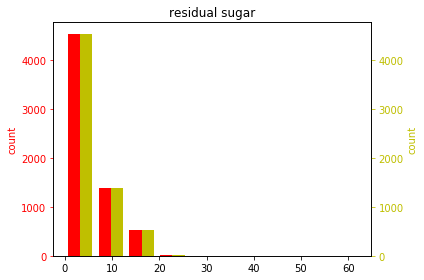

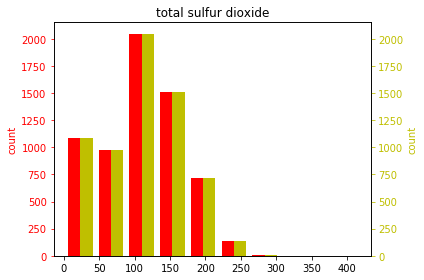

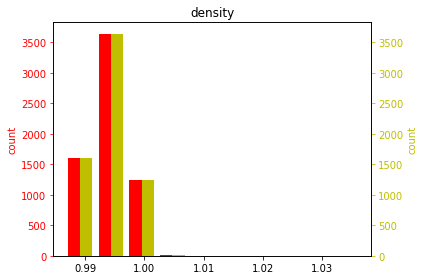

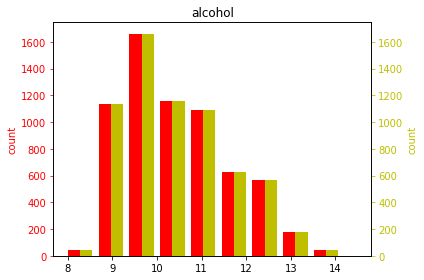

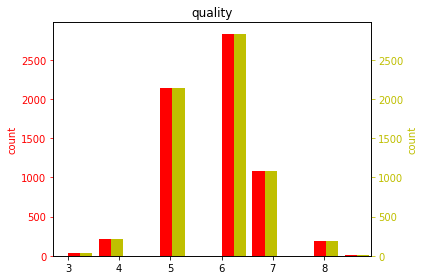

In [5]:
for col in rw.columns:
    plot_histogram(col)


In [25]:
data[data.columns[0:13]].head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality type  
0      8.8        6    1  
1      9.5        6    1  
2     10.1        6    1  
3      9.9        6    1  
4      9.9        6    1

In [26]:
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
label_names = 'type'
#label_data = data[label_names]/100
X_train, X_test, y_train, y_test = train_test_split(np.array(data[column_names]), np.array(data[label_names]), test_size=0.2, random_state=30)

#Make sure y_true contains classes in y_pred
np.unique(y_train)==np.unique(y_test)

array([ True,  True])

In [27]:
X_train

array([[ 6.3  ,  0.26 ,  0.24 , ...,  3.49 ,  0.64 ,  9.7  ],
       [ 6.7  ,  0.28 ,  0.28 , ...,  3.26 ,  0.39 , 11.7  ],
       [ 7.1  ,  0.16 ,  0.25 , ...,  3.27 ,  0.55 , 11.4  ],
       ...,
       [ 7.2  ,  0.24 ,  0.36 , ...,  3.13 ,  0.63 , 12.5  ],
       [ 6.8  ,  0.17 ,  0.17 , ...,  3.   ,  0.38 ,  9.8  ],
       [ 6.4  ,  0.795,  0.   , ...,  3.49 ,  0.52 , 11.6  ]])

In [ ]:
label = [3, 4, 5, 6, 7, 8, 9]
dummies = data['quality'].astype('category', categories=label)
dummies = pd.get_dummies(dummies, prefix='quality', prefix_sep='_')
data_sm = pd.concat([data, dummies], axis=1)
onehot_names = []
for i in label:
    onehot_names.append('quality_' + str(i))

In [31]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(data_sm[column_names], data_sm[onehot_names], test_size=0.2, random_state=20)
y_train_sm.head()

NameError: name 'data_sm' is not defined

#https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [48]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure(figsize=(12, 8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



@article{scikit-learn,
 title={Scikit-learn: Machine Learning in {P}ython},
 author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.
         and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P.
         and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and
         Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.},
 journal={Journal of Machine Learning Research},
 volume={12},
 pages={2825--2830},
 year={2011}
}

In [9]:
clf1a = DecisionTreeClassifier(max_depth=300)
clf2a = KNeighborsClassifier(n_neighbors=200)
clf3a = SVC(gamma='scale', kernel='poly', degree=4, probability=True)
clf4a = LogisticRegression(random_state=1, solver='newton-cg')
clf5a = XGBClassifier()
clf6a = ExtraTreesClassifier(n_estimators=2000)
clf7a = GradientBoostingClassifier(n_estimators=2000, max_leaf_nodes=500, max_depth=None, random_state=2, min_samples_split=5)
clf8a = MLPClassifier(solver='adam', learning_rate_init=0.001, momentum=0, activation='relu', max_iter=10000)
eclf = VotingClassifier(estimators=[ ('dt', clf1a), ('knn', clf2a), ('svc', clf3a), ('lr', clf4a), ('xgb', clf5a), ('etc', clf6a), ('gbc', clf7a), ('mlp', clf8a)],  voting='soft', weights=[1, 1, 1, 1, 1, 1, 1, 1])
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
gpc = GaussianProcessClassifier(1.0 * RBF(1.0))

In [10]:
pickclf = clf6a
pickclf.fit(X_train, y_train)
print("{0}".format(accuracy_score(y_test, pickclf.predict(X_test))))
#y_train

0.9969230769230769


In [11]:
y_train

array(['1', '0', '1', ..., '1', '1', '0'], dtype=object)

In [12]:
clf1a.fit(X_train, y_train)
clf2a.fit(X_train, y_train)
clf3a.fit(X_train, y_train)
clf4a.fit(X_train, y_train)
clf5a.fit(X_train, y_train)
clf6a.fit(X_train, y_train)
clf7a.fit(X_train, y_train)
clf8a.fit(X_train, y_train)
#eclf.fit(X_train, y_train)
#tpot.fit(X_train, y_train)
#gpc.fit(X_train, y_train)

print("\nAccuracy Score")
print("DecisionTreeClassifier {0}".format(accuracy_score(y_test, clf1a.predict(X_test))))
print("KNeighborsClassifier   {0}".format(accuracy_score(y_test, clf2a.predict(X_test))))
print("SVC                    {0}".format(accuracy_score(y_test, clf3a.predict(X_test))))
print("LogisticRegression     {0}".format(accuracy_score(y_test, clf4a.predict(X_test))))
print("XGBClassifier          {0}".format(accuracy_score(y_test, clf5a.predict(X_test))))
print("ExtraTreesClassifier   {0}".format(accuracy_score(y_test, clf6a.predict(X_test))))
print("GradientBoosting       {0}".format(accuracy_score(y_test, clf7a.predict(X_test))))
print("MLPClassifier          {0}".format(accuracy_score(y_test, clf8a.predict(X_test))))
#print("VotingClassifier       {0}".format(accuracy_score(y_test, eclf.predict(X_test))))
#print("TPOT                   {0}".format(accuracy_score(y_test, tpot.predict(X_test))))
#print("GaussianProcess        {0}".format(accuracy_score(y_test, gpc.predict(X_test))))
print("\nBalance Accuracy Score")
print("DecisionTreeClassifier {0}".format(balanced_accuracy_score(y_test, clf1a.predict(X_test))))
print("KNeighborsClassifier   {0}".format(balanced_accuracy_score(y_test, clf2a.predict(X_test))))
print("SVC                    {0}".format(balanced_accuracy_score(y_test, clf3a.predict(X_test))))
print("LogisticRegression     {0}".format(balanced_accuracy_score(y_test, clf4a.predict(X_test))))
print("XGBClassifier          {0}".format(balanced_accuracy_score(y_test, clf5a.predict(X_test))))
print("ExtraTreesClassifier   {0}".format(balanced_accuracy_score(y_test, clf6a.predict(X_test))))
print("GradientBoosting       {0}".format(balanced_accuracy_score(y_test, clf7a.predict(X_test))))
print("MLPClassifier          {0}".format(balanced_accuracy_score(y_test, clf8a.predict(X_test))))
#print("VotingClassifier       {0}".format(balanced_accuracy_score(y_test, eclf.predict(X_test))))
#print("TPOT                   {0}".format(balanced_accuracy_score(y_test, tpot.predict(X_test))))
#print("GaussianProcess        {0}".format(balanced_accuracy_score(y_test, gpc.predict(X_test))))



Accuracy Score
DecisionTreeClassifier 0.9853846153846154
KNeighborsClassifier   0.9307692307692308
SVC                    0.9046153846153846
LogisticRegression     0.9876923076923076
XGBClassifier          0.9953846153846154
ExtraTreesClassifier   0.9969230769230769
GradientBoosting       0.9930769230769231
MLPClassifier          0.9861538461538462

Balance Accuracy Score
DecisionTreeClassifier 0.97908215010142
KNeighborsClassifier   0.8925673717762967
SVC                    0.8929416594223896
LogisticRegression     0.983392494929006
XGBClassifier          0.9922908818699894
ExtraTreesClassifier   0.9951644450883802
GradientBoosting       0.9916268231430503
MLPClassifier          0.9796073601854536


In [71]:
eclf.fit(X_train, y_train)
tpot.fit(X_train, y_train)
gpc.fit(X_train, y_train)


xt = X_train[:]

plt.figure(figsize=(20, 10))
plt.plot(eclf.predict(xt), 'r+', label='VotingRegressor')
plt.plot(tpot.predict(xt), 'g^', label='TPOT')
plt.plot(gpc.predict(xt), 'b*', label='GaussianProcess')

plt.tick_params(axis='x', which='both', bottom=True, top=True,
                labelbottom=True)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Comparison of individual predictions with averaged')
plt.show()

print("\nAccuracy Score")
print("VotingClassifier       {0}".format(accuracy_score(y_test, eclf.predict(X_test))))
print("TPOT                   {0}".format(accuracy_score(y_test, tpot.predict(X_test))))
print("GaussianProcess        {0}".format(accuracy_score(y_test, gpc.predict(X_test))))
print("\nBalance Accuracy Score")
print("VotingClassifier       {0}".format(balanced_accuracy_score(y_test, eclf.predict(X_test))))
print("TPOT                   {0}".format(balanced_accuracy_score(y_test, tpot.predict(X_test))))
print("GaussianProcess        {0}".format(balanced_accuracy_score(y_test, gpc.predict(X_test))))


Generation 1 - Current best internal CV score: 0.9955759944304683
Generation 2 - Current best internal CV score: 0.9955759944304683
Generation 3 - Current best internal CV score: 0.9955759944304683
Generation 4 - Current best internal CV score: 0.9955759944304683
Generation 5 - Current best internal CV score: 0.995768487211989

Best pipeline: RandomForestClassifier(PolynomialFeatures(ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=gini, max_features=1.0, min_samples_leaf=1, min_samples_split=14, n_estimators=100), degree=2, include_bias=False, interaction_only=False), bootstrap=False, criterion=entropy, max_features=0.45, min_samples_leaf=10, min_samples_split=7, n_estimators=100)



Accuracy Score
VotingClassifier       0.9915384615384616
TPOT                   0.9953846153846154
GaussianProcess        0.9930769230769231

Balance Accuracy Score
VotingClassifier       0.9878416883994978
TPOT                   0.994114024920313
GaussianProcess        0.9907152516178885


In [148]:
for clf, label in zip([clf1a, clf2a, clf3a, clf4a, clf5a, clf6a, clf7a, clf8a, eclf], ['DecisionTreeClassifier', 'KNeighborsClassifier', 'SVC', 'LogisticRegression', 'XGBClassifier', 'ExtraTreesClassifier', 'GradientBoosting', 'MLPClassifier', 'VotingClassifier']):
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    

Accuracy: 0.58 (+/- 0.02) [DecisionTreeClassifier]
Accuracy: 0.49 (+/- 0.02) [KNeighborsClassifier]
Accuracy: 0.48 (+/- 0.01) [SVC]
Accuracy: 0.59 (+/- 0.02) [LogisticRegression]
Accuracy: 0.62 (+/- 0.03) [XGBClassifier]
Accuracy: 0.66 (+/- 0.02) [ExtraTreesClassifier]
Accuracy: 0.62 (+/- 0.03) [GradientBoosting]
Accuracy: 0.54 (+/- 0.04) [MLPClassifier]
Accuracy: 0.65 (+/- 0.02) [VotingClassifier]


In [ ]:
tpot.export()

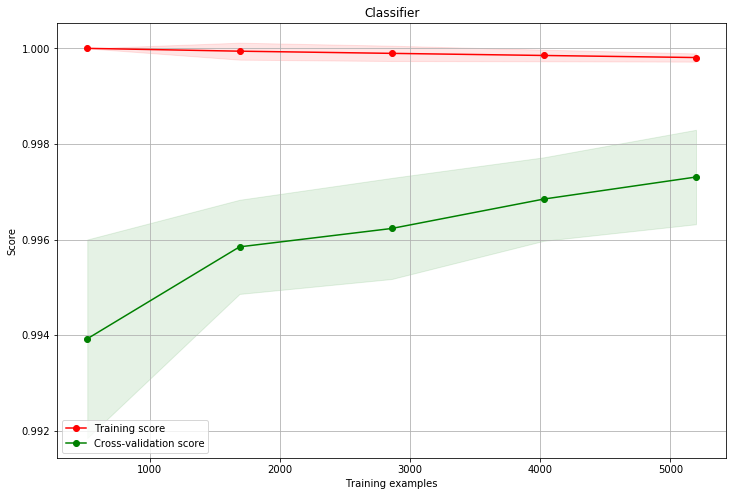

In [50]:
title = r"Classifier"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(clf6a, title, data[column_names], data[label_names], cv=cv, n_jobs=4)
plt.show()

In [ ]:
matrix = np.asmatrix(rw[['quality']])
np.array(matrix[:,0])
plt.plot(np.array(matrix[:,0]))

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html


In [72]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=3).fit_transform(data[column_names], data[label_names])

In [73]:
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality type  
0         8.8        6    1  
1         9.5        6    1  
2        10.1        6    1  
3         9.9        6    1  
4         9.9        6    1  
...       ...      ...  ...  
1594     10.5        5    0  
1595     11.2        6    0  
1596     11.0        6    0  
1597     10.2        5    0  
1598     11.0        6    0  

[6497 rows x 13 columns]

In [74]:
X_new

array([[ 20.7,  45. , 170. ],
       [  1.6,  14. , 132. ],
       [  6.9,  30. ,  97. ],
       ...,
       [  2.3,  29. ,  40. ],
       [  2. ,  32. ,  44. ],
       [  3.6,  18. ,  42. ]])

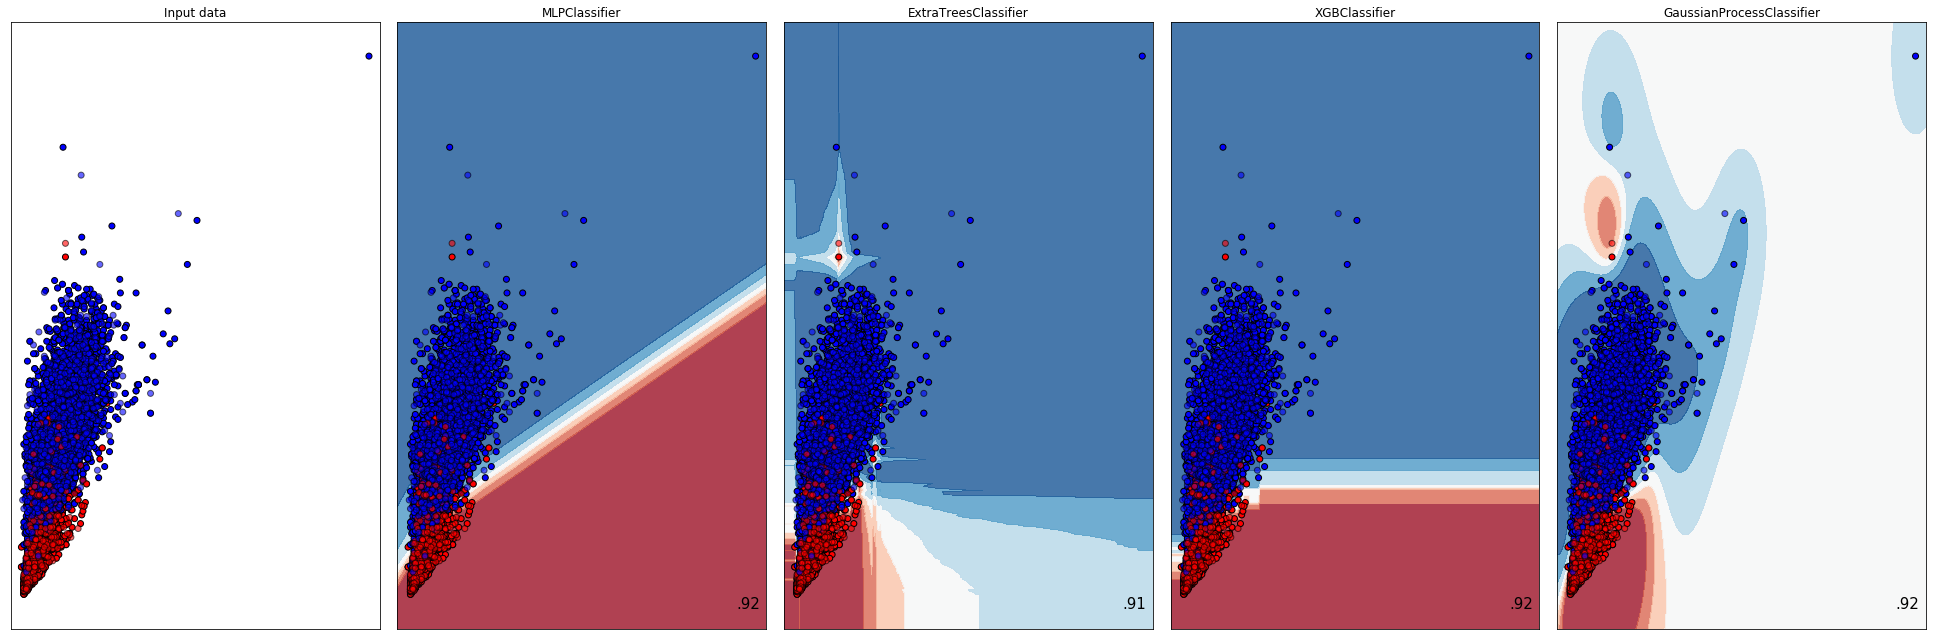

In [58]:
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


h = .02  # step size in the mesh

names = ["MLPClassifier", "ExtraTreesClassifier", 'XGBClassifier', 'GaussianProcessClassifier']

classifiers = [MLPClassifier(solver='adam', learning_rate_init=0.001, momentum=0, activation='relu', max_iter=10000),
               ExtraTreesClassifier(n_estimators=2000), XGBClassifier(),
               GaussianProcessClassifier(1.0 * RBF(1.0))]

_column_names = ['free sulfur dioxide', 'total sulfur dioxide']

#column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
datasets = [(np.array(data[_column_names]), np.array(data[label_names]))]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):

#for v in range(1):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

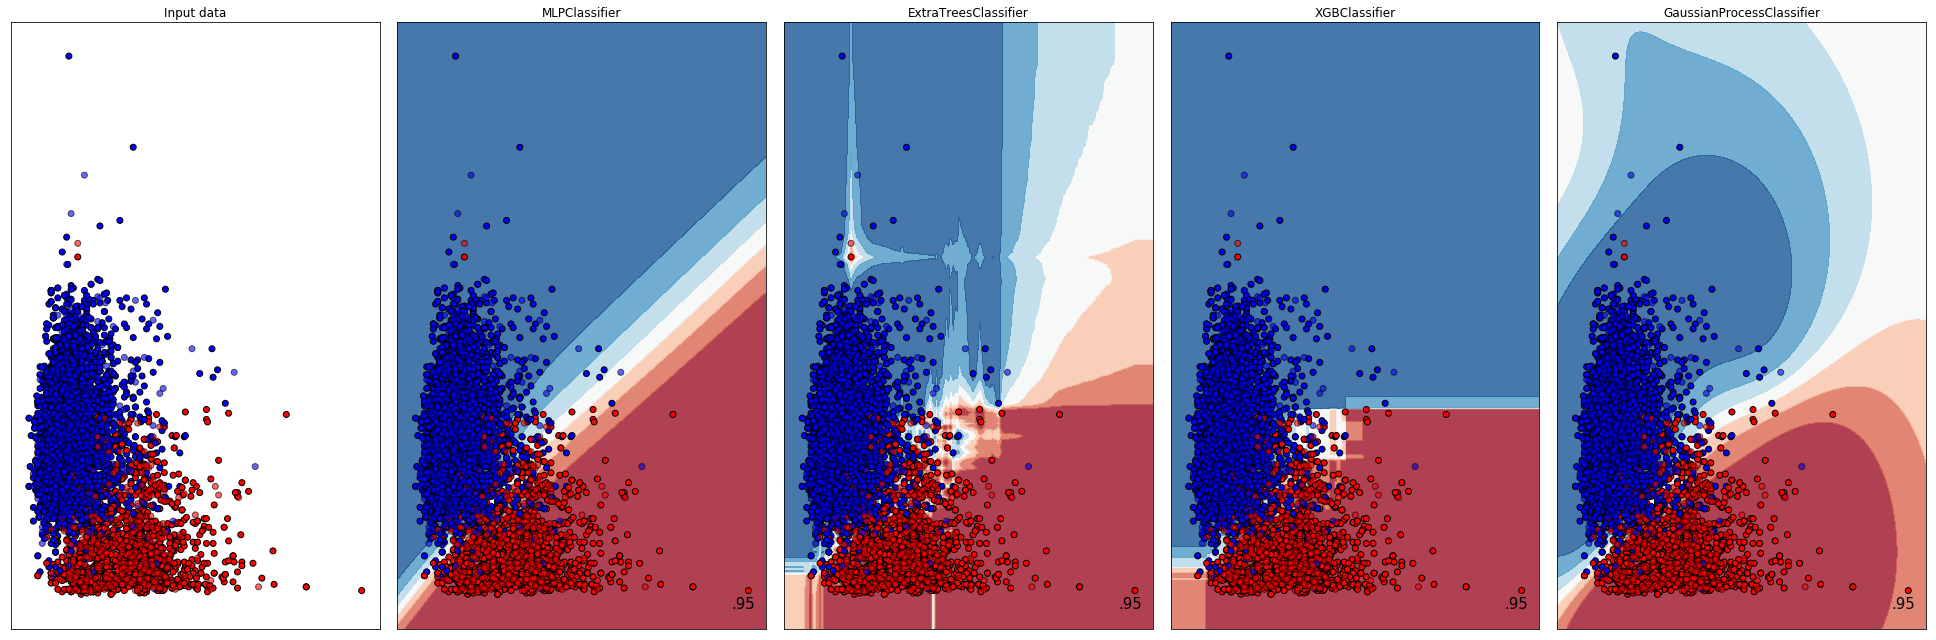

In [75]:
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


h = .02  # step size in the mesh

names = ["MLPClassifier", "ExtraTreesClassifier", 'XGBClassifier', 'GaussianProcessClassifier']

classifiers = [MLPClassifier(solver='adam', learning_rate_init=0.001, momentum=0, activation='relu', max_iter=10000),
               ExtraTreesClassifier(n_estimators=2000), XGBClassifier(),
               GaussianProcessClassifier(1.0 * RBF(1.0))]

_column_names = ['volatile acidity', 'total sulfur dioxide']

#column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
datasets = [(np.array(data[_column_names]), np.array(data[label_names]))]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):

#for v in range(1):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

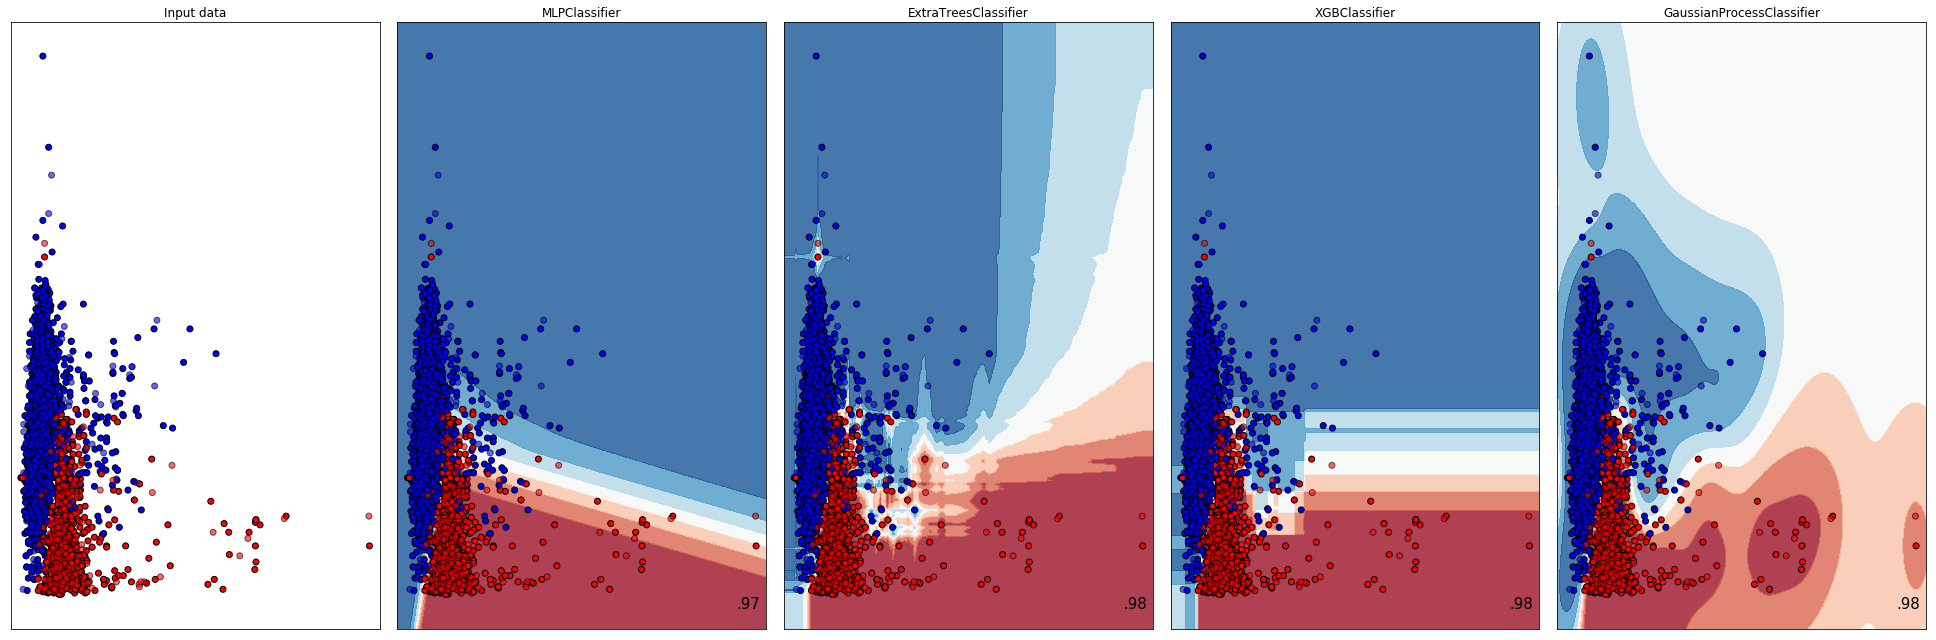

In [111]:
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


h = .02  # step size in the mesh

names = ["MLPClassifier", "ExtraTreesClassifier", 'XGBClassifier', 'GaussianProcessClassifier']

classifiers = [MLPClassifier(solver='adam', learning_rate_init=0.001, momentum=0, activation='relu', max_iter=10000),
               ExtraTreesClassifier(n_estimators=2000), XGBClassifier(),
               GaussianProcessClassifier(1.0 * RBF(1.0))]

_column_names = ['chlorides', 'total sulfur dioxide']

#column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
datasets = [(np.array(data[_column_names]), np.array(data[label_names]))]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):

#for v in range(1):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [115]:
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF


h = .02  # step size in the mesh

names = ["MLPClassifier", "ExtraTreesClassifier", 'GaussianProcessClassifier']

classifiers = [MLPClassifier(solver='adam', learning_rate_init=0.001, momentum=0, activation='relu', max_iter=10000),
               ExtraTreesClassifier(n_estimators=2000), 
               GaussianProcessClassifier(1.0 * RBF(1.0))]

_column_names = ['chlorides', 'total sulfur dioxide']

#column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
datasets = [(np.array(data[_column_names]), np.array(data[label_names]))]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):

#for v in range(1):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1
plt.xlabel(_column_names[0])
plt.ylabel(_column_names[1])
plt.tight_layout()
plt.show()

In [5]:
def nn_sigmoid(data, num_features, ss=False):
    column_names_lookup = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
                           'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

    data, label_names, comb = pick_features(data, num_features, one_hot=False, binary=True)
    #override
    comb = [(7,5)]
    for columns in comb:
        column_names = []
        for i in columns:
            column_names.append(column_names_lookup[i-1])
        print("\n{0}\n".format(column_names))

        if ss:
            print("Using StandardScaler")
            X = StandardScaler().fit_transform(np.array(data[column_names]))
            # X = RobustScaler().fit_transform(np.array(data[column_names]))
        else:
            X = data[column_names]

        y = np.array(data[label_names])

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
        model = Sequential()
        model.add(Dense(128, activation='relu', input_dim=X_train.shape[1], kernel_initializer='he_normal'))
        model.add(Dropout(0.5))
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(y_train.shape[1], activation='sigmoid'))

        # opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
        # opt = SGD(lr=0.001, decay=1e-6)
        opt = Adamax(lr=0.005, beta_1=0.9, beta_2=0.999)
        # opt = RMSprop(lr=.002, rho=0.9)
        model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

        history = model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0, validation_split=.2)
        #predictions = model.predict(X_test)
        score = model.evaluate(X_test, y_test, batch_size=1)

        #
        # f = open('nn_' + filename + '_' + str(num_features) + '.txt', 'a')
        # f.write('[' + ', '.join(column_names) + "] - " + "Score: " + str(model.metrics_names) + " " + str(score) + "\n")
        # f.close()

        h = .02
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        
        figure = plt.figure(figsize=(21, 14))
        i=1
        cm = plt.cm.YlOrRd
        cm_bright = ListedColormap(['#FBFF00', '#FF0000'])
        ax = plt.subplot(2, 1 + 1, i)

        ax.set_title("Input data")
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1],  c=np.array(y_train[:, 0], dtype=float), cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1],  c=np.array(y_test[:, 0], dtype=float), cmap=cm_bright, alpha=0.6,
                   edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1
        ax = plt.subplot(2, 1 + 1, i)

        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=np.array(y_train[:, 0], dtype=float), cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=np.array(y_test[:, 0], dtype=float), cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title('Binary Classifier')
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score[1]).lstrip('0'),
                size=15, horizontalalignment='right')
        plt.xlabel(column_names[0])
        plt.ylabel(column_names[1])
        #plt.tight_layout()
        plt.show()

def pick_features(data, num_features, one_hot=True, binary=False):
    if one_hot:
        label = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
        # label = [3, 4, 5, 6, 7, 8]
        dummies = data['quality'].astype(CategoricalDtype(categories=label))
        dummies = pd.get_dummies(dummies, prefix='quality', prefix_sep='_')
        data = pd.concat([data, dummies], axis=1)
        label_names = []
        for i in label:
            label_names.append('quality_' + str(i))
    else:
        if (binary):
            label_names = ['type']
        else:
            label_names = ['quality']

    comb = []
    for i in list(combinations(range(1, 12), num_features)):
        comb.append(i)

    return data, label_names, comb


['total sulfur dioxide', 'chlorides']

Using StandardScaler




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








1300/1300 [==============================] - 1s 683us/step


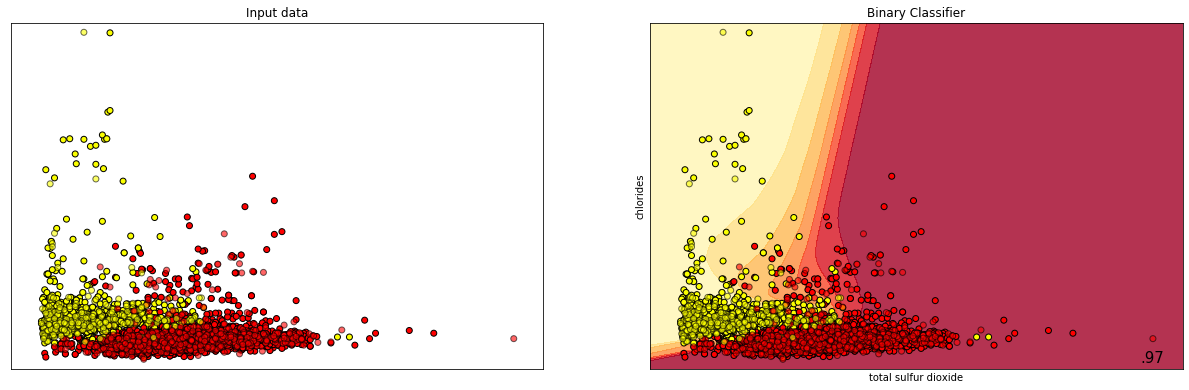

In [6]:
from itertools import combinations
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adamax
nn_sigmoid(data, 2, ss=True) 

In [29]:
import matplotlib.colors as colors
resr = np.array([[0,2],[3,4]],dtype=int)
norm = colors.BoundaryNorm(np.unique(resr), len(np.unique(resr))-1)
cm_bright = ListedColormap(['#FBFF00', '#FF0000'])
plt.imshow(resr, cmap=cm_bright,norm=norm);plt.colorbar()

In [32]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k=2).fit_transform(data[column_names], data[label_names])
X_new                                       

array([[ 45., 170.],
       [ 14., 132.],
       [ 30.,  97.],
       ...,
       [ 29.,  40.],
       [ 32.,  44.],
       [ 18.,  42.]])

In [11]:
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality type  
0         8.8        6    1  
1         9.5        6    1  
2        10.1        6    1  
3         9.9        6    1  
4         9.9        6    1  
...       ...      ...  ...  
1594     10.5        5    0  
1595     11.2        6    0  
1596     11.0        6    0  
1597     10.2        5    0  
1598     11.0        6    0  

[6497 rows x 13 columns]